In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
# include if using a Jupyter notebook
%matplotlib inline

In [2]:
frame = pandas.read_csv("digest.csv")
frame

,run,messages,batch_size,plugin_config,name,avg_byte_throughput,max_arena_size,max_in_use_size,max_mmap_size,close_time
0,0,large,small,mcap_default,run=0;messages=large;batch_size=small;plugin_c...,1.139212e+08,999424,1101888,2367488,0.000672
1,0,large,small,mcap_uncompressed,run=0;messages=large;batch_size=small;plugin_c...,1.123151e+08,1003520,1102752,0,0.000611
2,0,large,small,mcap_nocrc,run=0;messages=large;batch_size=small;plugin_c...,1.209342e+09,999424,1103216,0,0.000595
3,0,large,small,mcap_nochunking,run=0;messages=large;batch_size=small;plugin_c...,1.580977e+09,0,28784,0,0.000269
4,0,large,small,sqlite_default,run=0;messages=large;batch_size=small;plugin_c...,8.101885e+08,1134592,2167136,0,0.000155
...,...,...,...,...,...,...,...,...,...,...
235,4,mixed,default,mcap_uncompressed,run=4;messages=mixed;batch_size=default;plugin...,8.289338e+07,5251072,1919552,0,0.001363
236,4,mixed,default,mcap_nocrc,run=4;messages=mixed;batch_size=default;plugin...,2.953338e+08,5255168,1920272,0,0.001455
237,4,mixed,default,mcap_nochunking,run=4;messages=mixed;batch_size=default;plugin...,8.285815e+08,0,29664,0,0.000282
238,4,mixed,default,sqlite_default,run=4;messages=mixed;batch_size=default;plugin...,2.870194e+08,3227648,2167472,0,0.000137


In [134]:
means = frame.groupby(["plugin_config", "messages", "batch_size"])["avg_byte_throughput"].mean()
confidence_intervals = frame.groupby(["plugin_config", "messages", "batch_size"])["avg_byte_throughput"].std() * 3.92
joined = pandas.concat([means.rename("mean"), confidence_intervals.rename("ci")], axis=1).sort_values("mean", ascending=False)


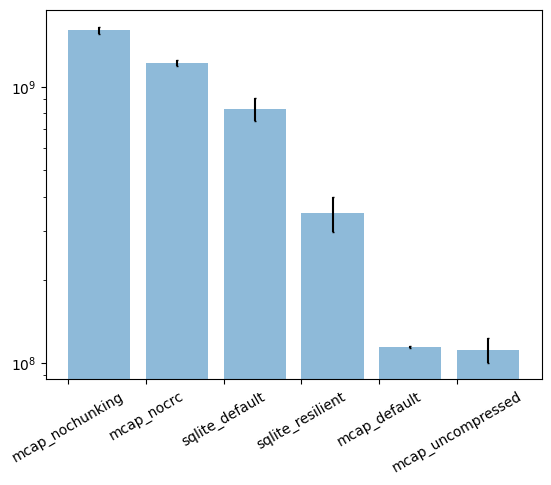

In [135]:
s = joined[np.logical_and(joined.index.isin(["large"], level=1), joined.index.isin(["small"], level=2))]
plt.bar(
    x=s.index.get_level_values(0),
    height=s["mean"],
    yerr=s["ci"],
    align='edge',
    alpha=0.5,
    ecolor='black',
    capsize=1,
    log=True
)
plt.xticks(rotation=30)
plt.show()

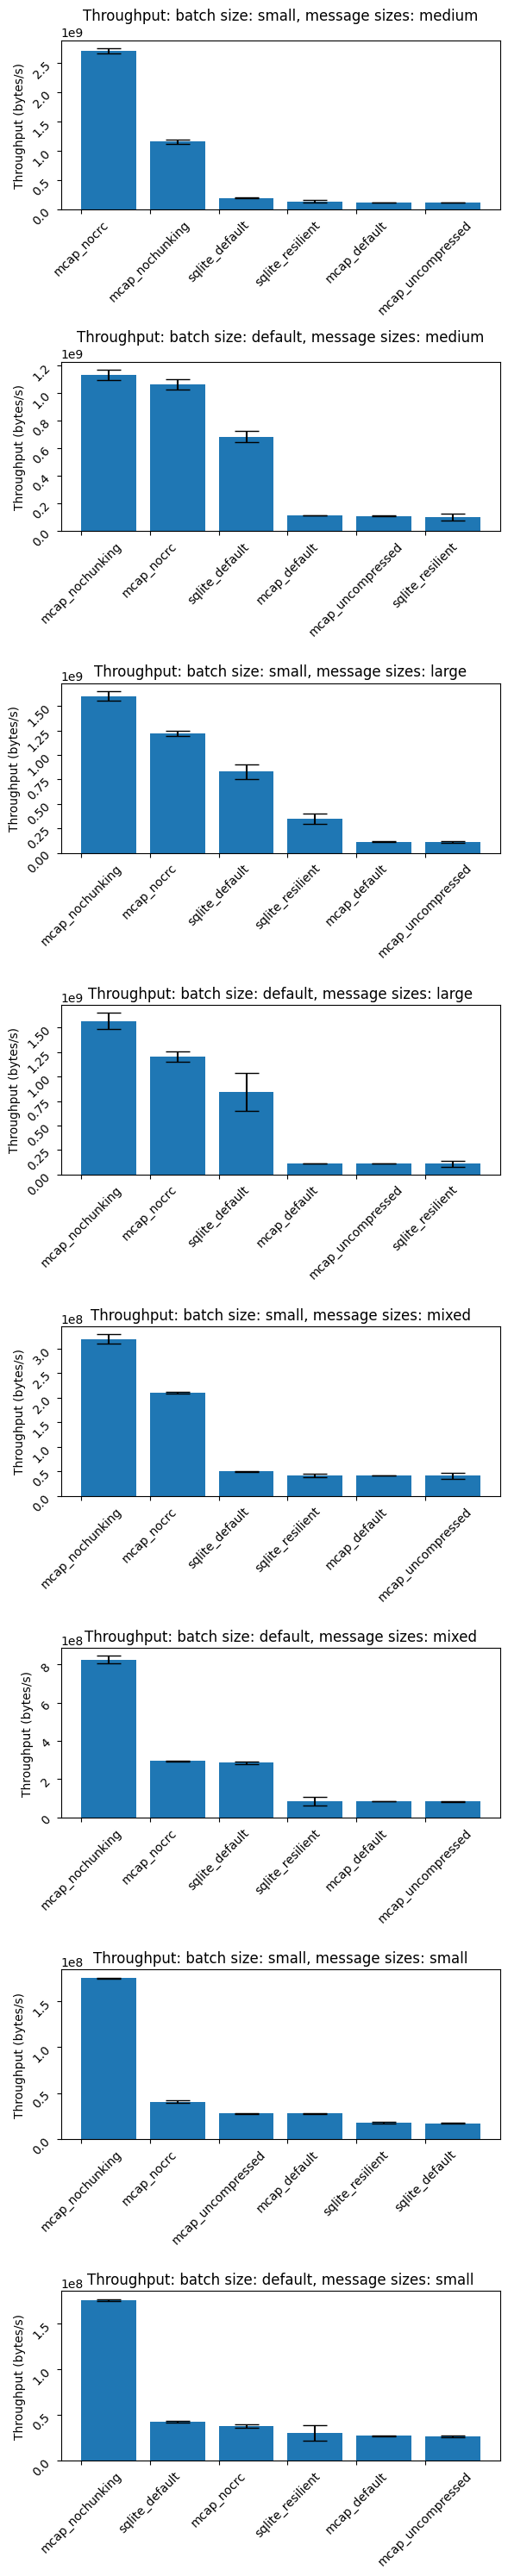

In [137]:
message_labels = joined.index.get_level_values("messages").unique()
batch_labels = joined.index.get_level_values("batch_size").unique()
figure, subplots = plt.subplots(len(batch_labels) * len(message_labels), figsize=[6, 30])
for message_label_idx, message_label in enumerate(message_labels):
    for batch_label_idx, batch_label in enumerate(batch_labels):
        plot = subplots[batch_label_idx + len(batch_labels) * message_label_idx]
        s = joined[np.logical_and(joined.index.isin([message_label], level=1), joined.index.isin([batch_label], level=2))]
        plot.bar(
            x=s.index.get_level_values(0),
            height=s["mean"],
            yerr=s["ci"],
            align='edge',
            ecolor='black',
            capsize=10,
        )
        plot.set_ylabel("Throughput (bytes/s)")
        plot.set_title(f"Throughput: batch size: {batch_label}, message sizes: {message_label}")
        plot.tick_params(labelrotation=45)
figure.tight_layout()
